In [49]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

In [50]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

In [51]:
training_images, testing_images = training_images / 255, testing_images / 255

In [52]:
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

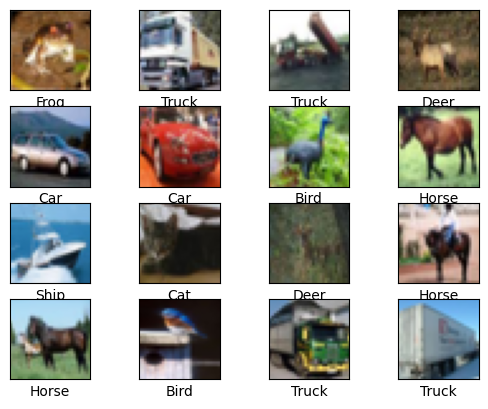

In [53]:
for i in range(16):
    plt.subplot(4, 4, i+1),
    plt.xticks([]),
    plt.yticks([]),
    plt.imshow(training_images[i], cmap=plt.cm.binary),
    plt.xlabel(class_names[training_labels[i][0]])
plt.show()

training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

In [54]:
model = models.Sequential()

In [55]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

In [56]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [57]:
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(patience=3, factor=0.5)

In [58]:
history = model.fit(
    training_images,
    training_labels,
    epochs=30,
    validation_data=(testing_images, testing_labels),
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/30
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5770 - accuracy: 0.4283 - val_loss: 1.2709 - val_accuracy: 0.5399 - lr: 0.0010
Epoch 2/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2441 - accuracy: 0.5596 - val_loss: 1.4154 - val_accuracy: 0.5026 - lr: 0.0010
Epoch 3/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1140 - accuracy: 0.6095 - val_loss: 1.0548 - val_accuracy: 0.6171 - lr: 0.0010
Epoch 4/30
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0260 - accuracy: 0.6415 - val_loss: 0.9942 - val_accuracy: 0.6539 - lr: 0.0010
Epoch 5/30
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9684 - accuracy: 0.6651 - val_loss: 0.9945 - val_accuracy: 0.6451 - lr: 0.0010
Epoch 6/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9265 - accuracy: 0.6778 - val_loss: 0.9320 - val_accuracy: 0.6734 - lr: 0.0010
Epoch 7/30
1563/1563 [==============================

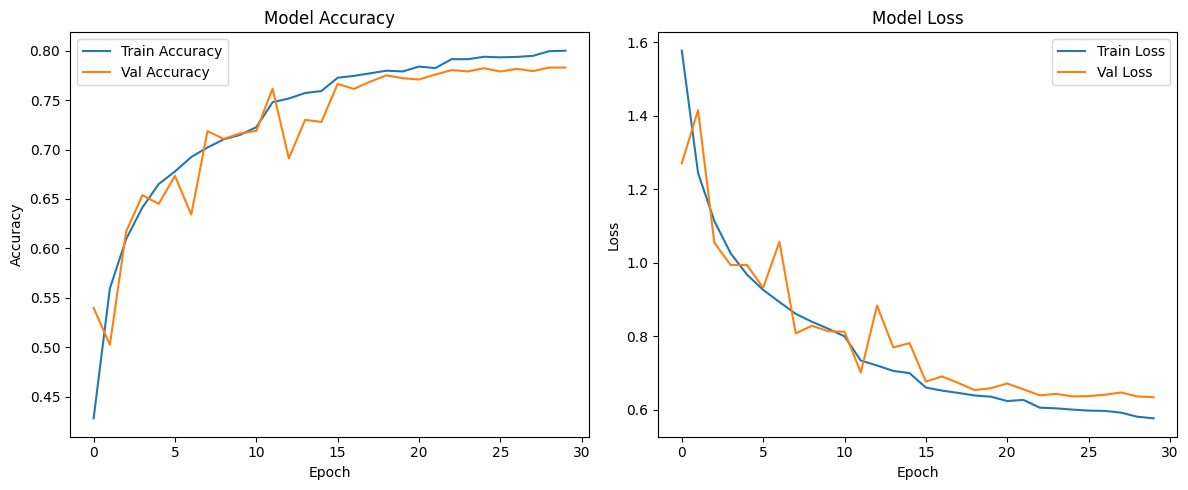

In [59]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()